#Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load Dataset

##Mount my Gdirve

In [ ]:
from google.colab import drive
ROOT = "/content/GDrive"
drive.mount(ROOT)

Drive already mounted at /content/GDrive; to attempt to forcibly remount, call drive.mount("/content/GDrive", force_remount=True).


##CSV Format

In [ ]:
data_path = "/content/GDrive/MyDrive/COS3302/Midterm/wheat-seeds.csv"
columns = ["Area","Perimeter","Compactness","Length of kernel","Width of kernel","Asymmetry coefficient","Length of kernel groove","Classes"]
data = pd.read_csv(data_path, names = columns)

In [ ]:
data['Classes'].replace(1, 'Kama', inplace=True)
data['Classes'].replace(2, 'Rosa', inplace=True)
data['Classes'].replace(3, 'Canadian', inplace=True)

In [ ]:
numerical_attributes = data.select_dtypes(include=['float'])

#Exploring data

In [ ]:
data.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Classes
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama


#Data Exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Classes                  210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


##Statistics Description

In [ ]:
data.describe().round(2)

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
count,210.00,210.00,210.00,210.00,210.00,210.00,210.00
mean,14.85,14.56,0.87,5.63,3.26,3.70,5.41
std,2.91,1.31,0.02,0.44,0.38,1.50,0.49
min,10.59,12.41,0.81,4.90,2.63,0.77,4.52
25%,12.27,13.45,0.86,5.26,2.94,2.56,5.04
50%,14.36,14.32,0.87,5.52,3.24,3.60,5.22
75%,17.30,15.72,0.89,5.98,3.56,4.77,5.88
max,21.18,17.25,0.92,6.68,4.03,8.46,6.55


In [ ]:
print("Length of kernel groove Statistics")
print(data['Length of kernel groove'].describe().round(2))

Length of kernel groove Statistics
count    210.00
mean       5.41
std        0.49
min        4.52
25%        5.04
50%        5.22
75%        5.88
max        6.55
Name: Length of kernel groove, dtype: float64


#Visualization

##Histrogram

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'Length of kernel'}>,
        <Axes: title={'center': 'Width of kernel'}>,
        <Axes: title={'center': 'Asymmetry coefficient'}>],
       [<Axes: title={'center': 'Length of kernel groove'}>, <Axes: >,
        <Axes: >]], dtype=object)

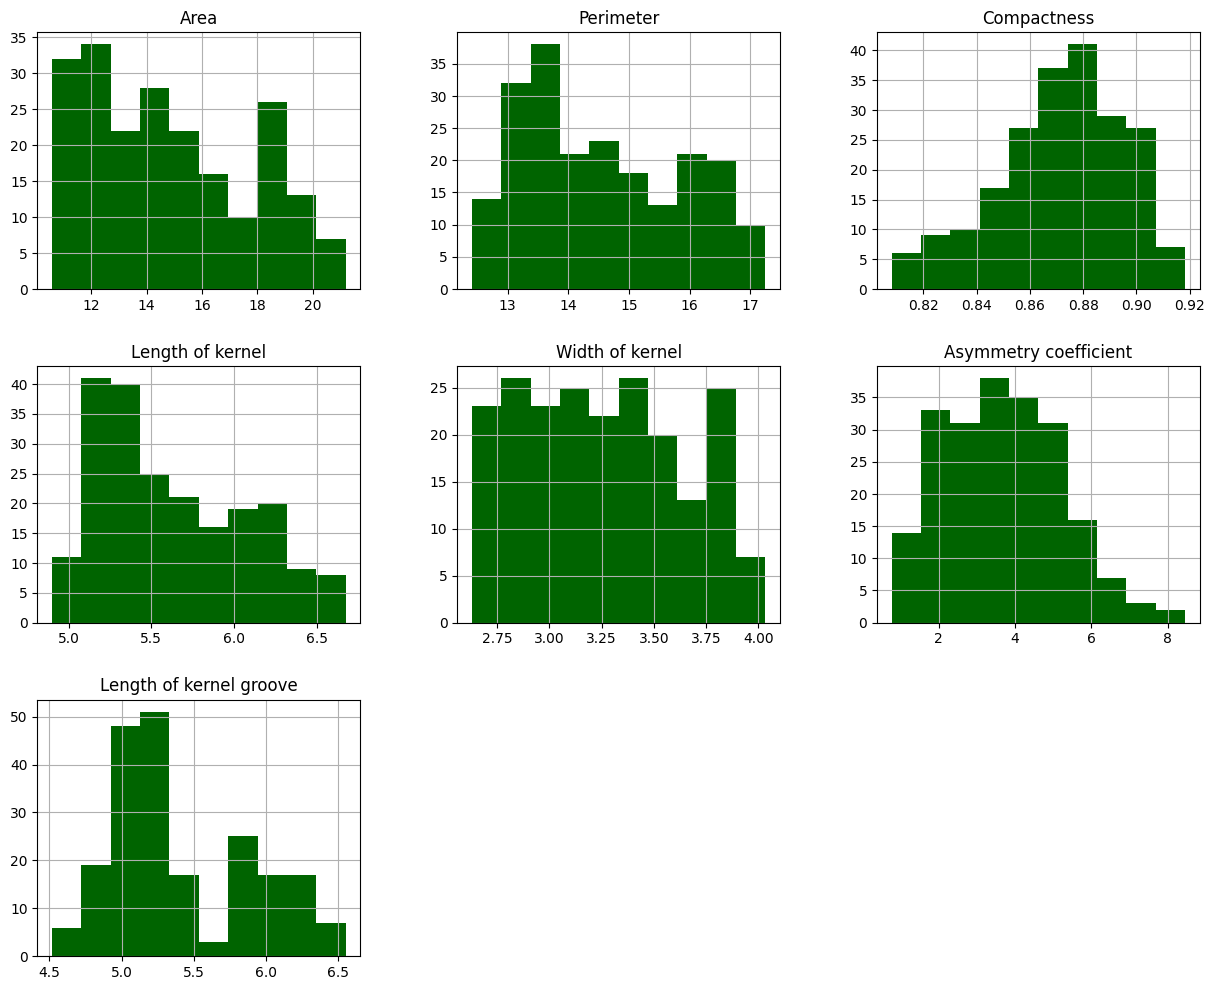

In [ ]:
numerical_attributes = data.select_dtypes(include=['float'])
numerical_attributes.hist(figsize=(15,12), color = 'darkgreen')

##Box Plot

<Axes: xlabel='Classes', ylabel='Area'>

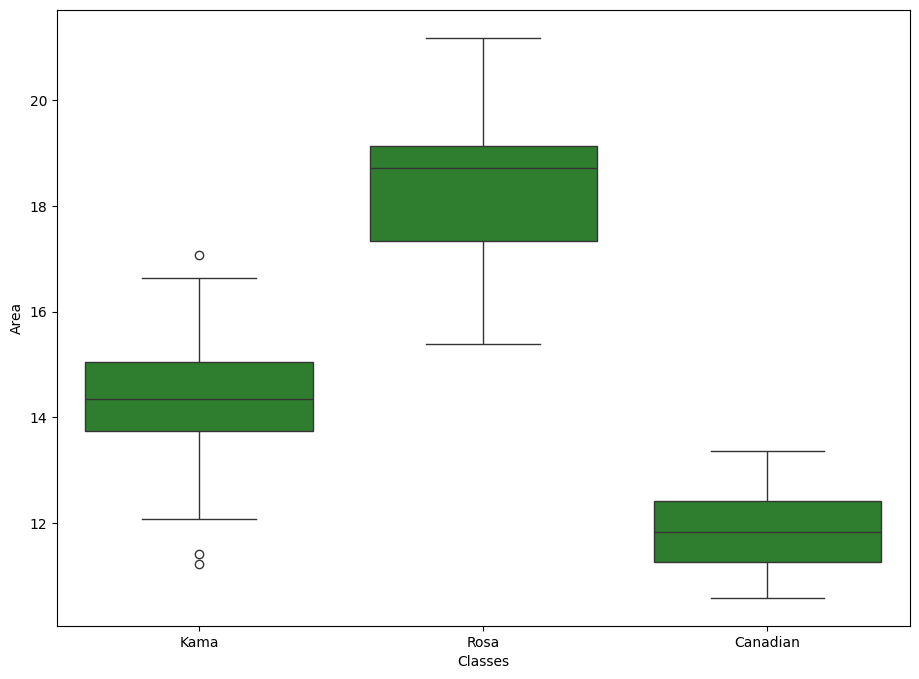

In [ ]:
plt.figure(figsize=(11,8))
sns.boxplot(x="Classes",y="Area", color = "forestgreen", data=data)

<Axes: xlabel='Classes', ylabel='Perimeter'>

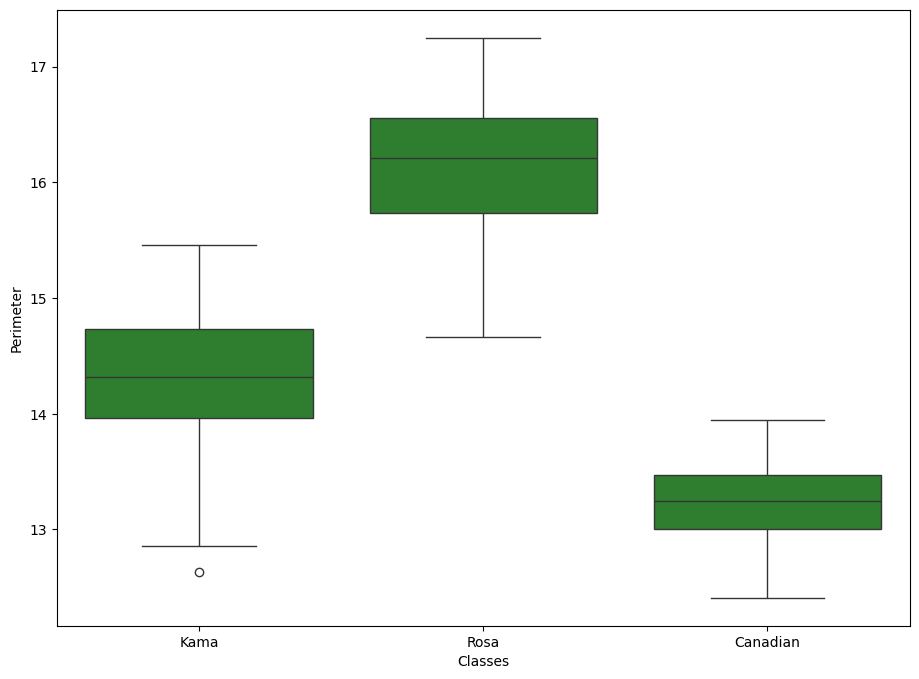

In [ ]:
plt.figure(figsize=(11,8))
sns.boxplot(x="Classes",y="Perimeter", color = "forestgreen", data=data)

<Axes: xlabel='Classes', ylabel='Compactness'>

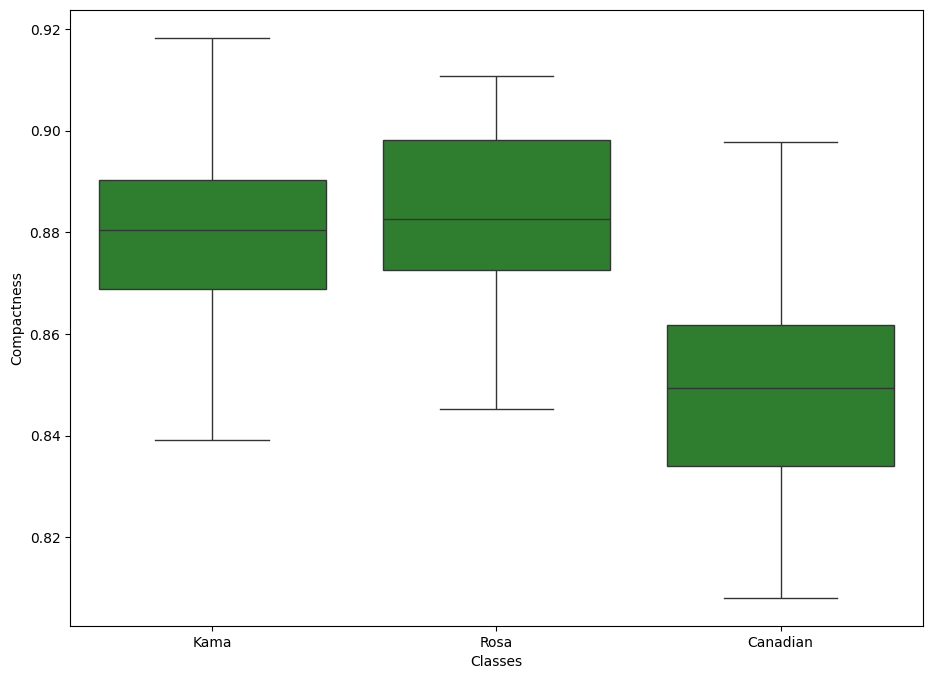

In [ ]:
plt.figure(figsize=(11,8))
sns.boxplot(x="Classes",y="Compactness", color = "forestgreen", data=data)

<Axes: xlabel='Classes', ylabel='Length of kernel'>

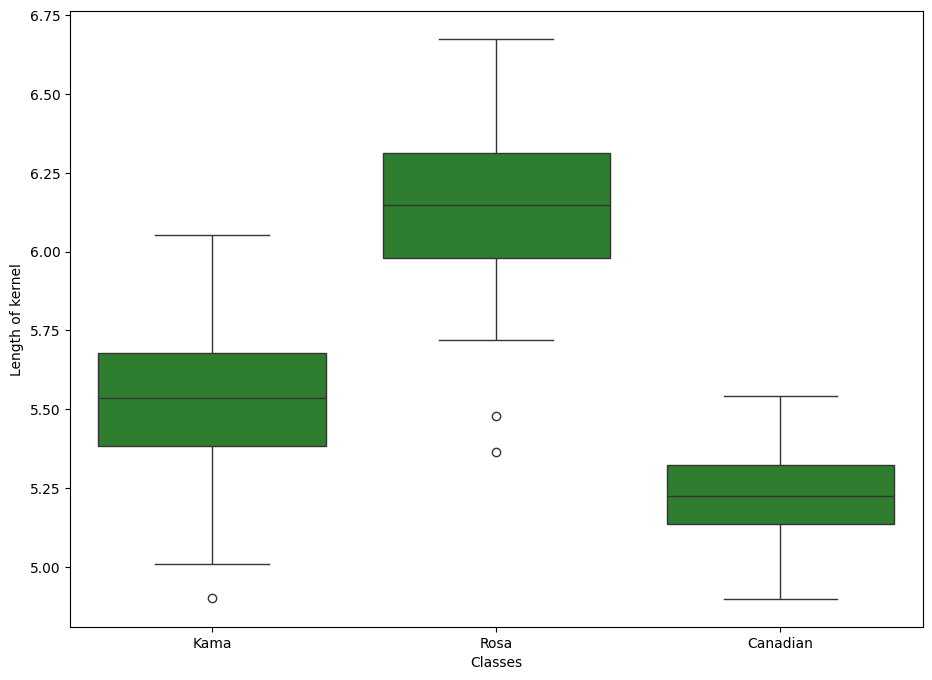

In [ ]:
plt.figure(figsize=(11,8))
sns.boxplot(x="Classes",y="Length of kernel", color = "forestgreen", data=data)

<Axes: xlabel='Classes', ylabel='Width of kernel'>

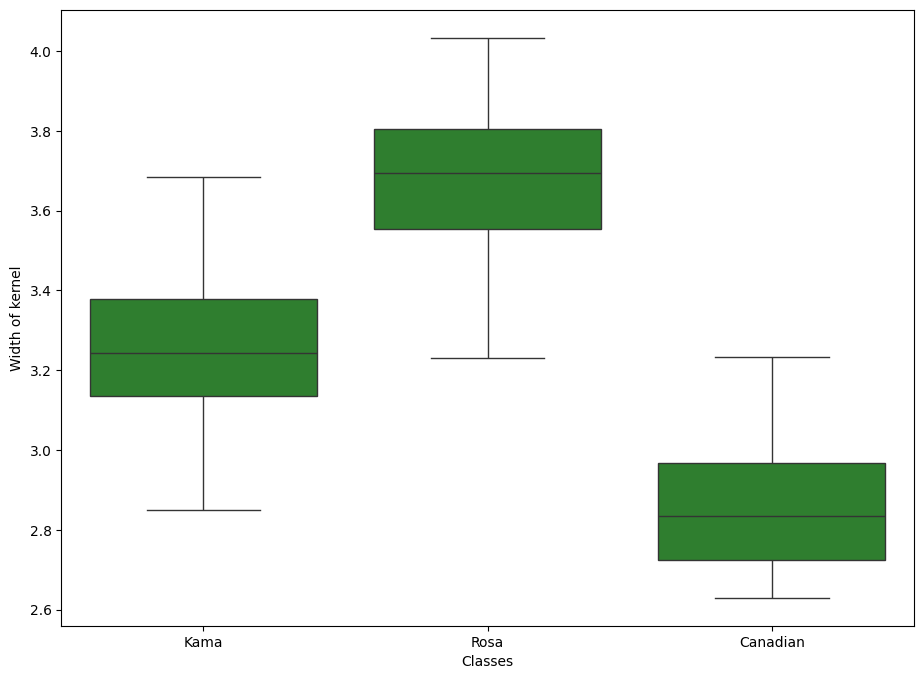

In [ ]:
plt.figure(figsize=(11,8))
sns.boxplot(x="Classes",y="Width of kernel", color = "forestgreen", data=data)

<Axes: xlabel='Classes', ylabel='Asymmetry coefficient'>

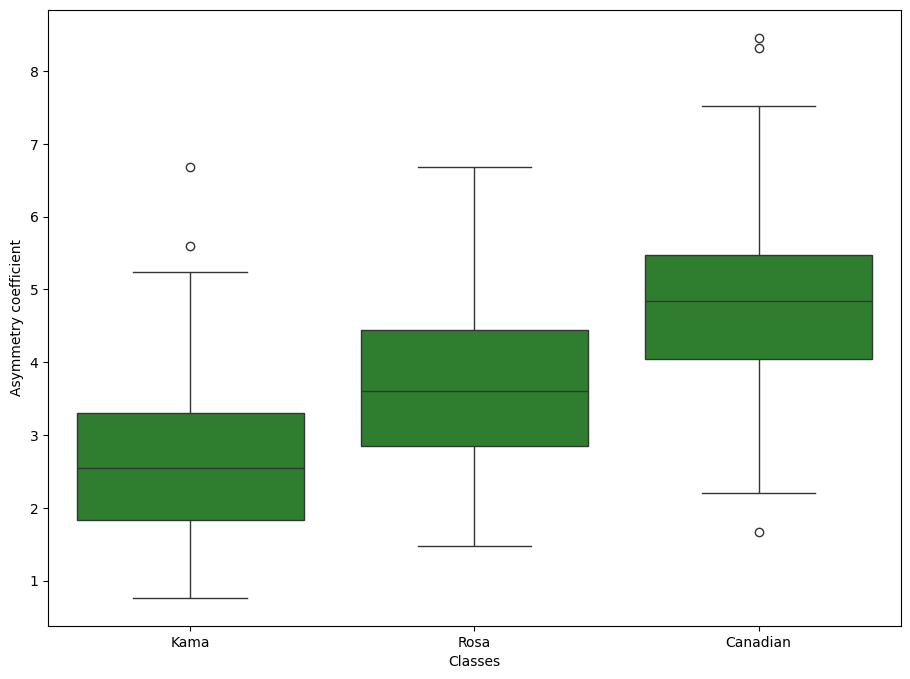

In [ ]:
plt.figure(figsize=(11,8))
sns.boxplot(x="Classes",y="Asymmetry coefficient", color = "forestgreen", data=data)

<Axes: xlabel='Classes', ylabel='Length of kernel groove'>

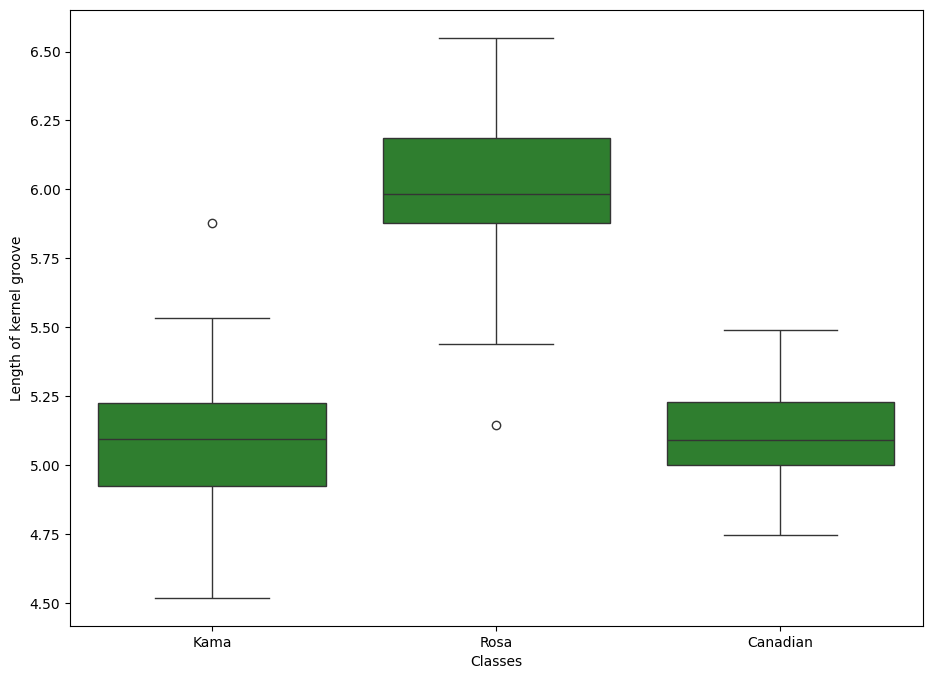

In [ ]:
plt.figure(figsize=(11,8))
sns.boxplot(x="Classes",y="Length of kernel groove", color = "forestgreen", data=data)

##Pair Plot

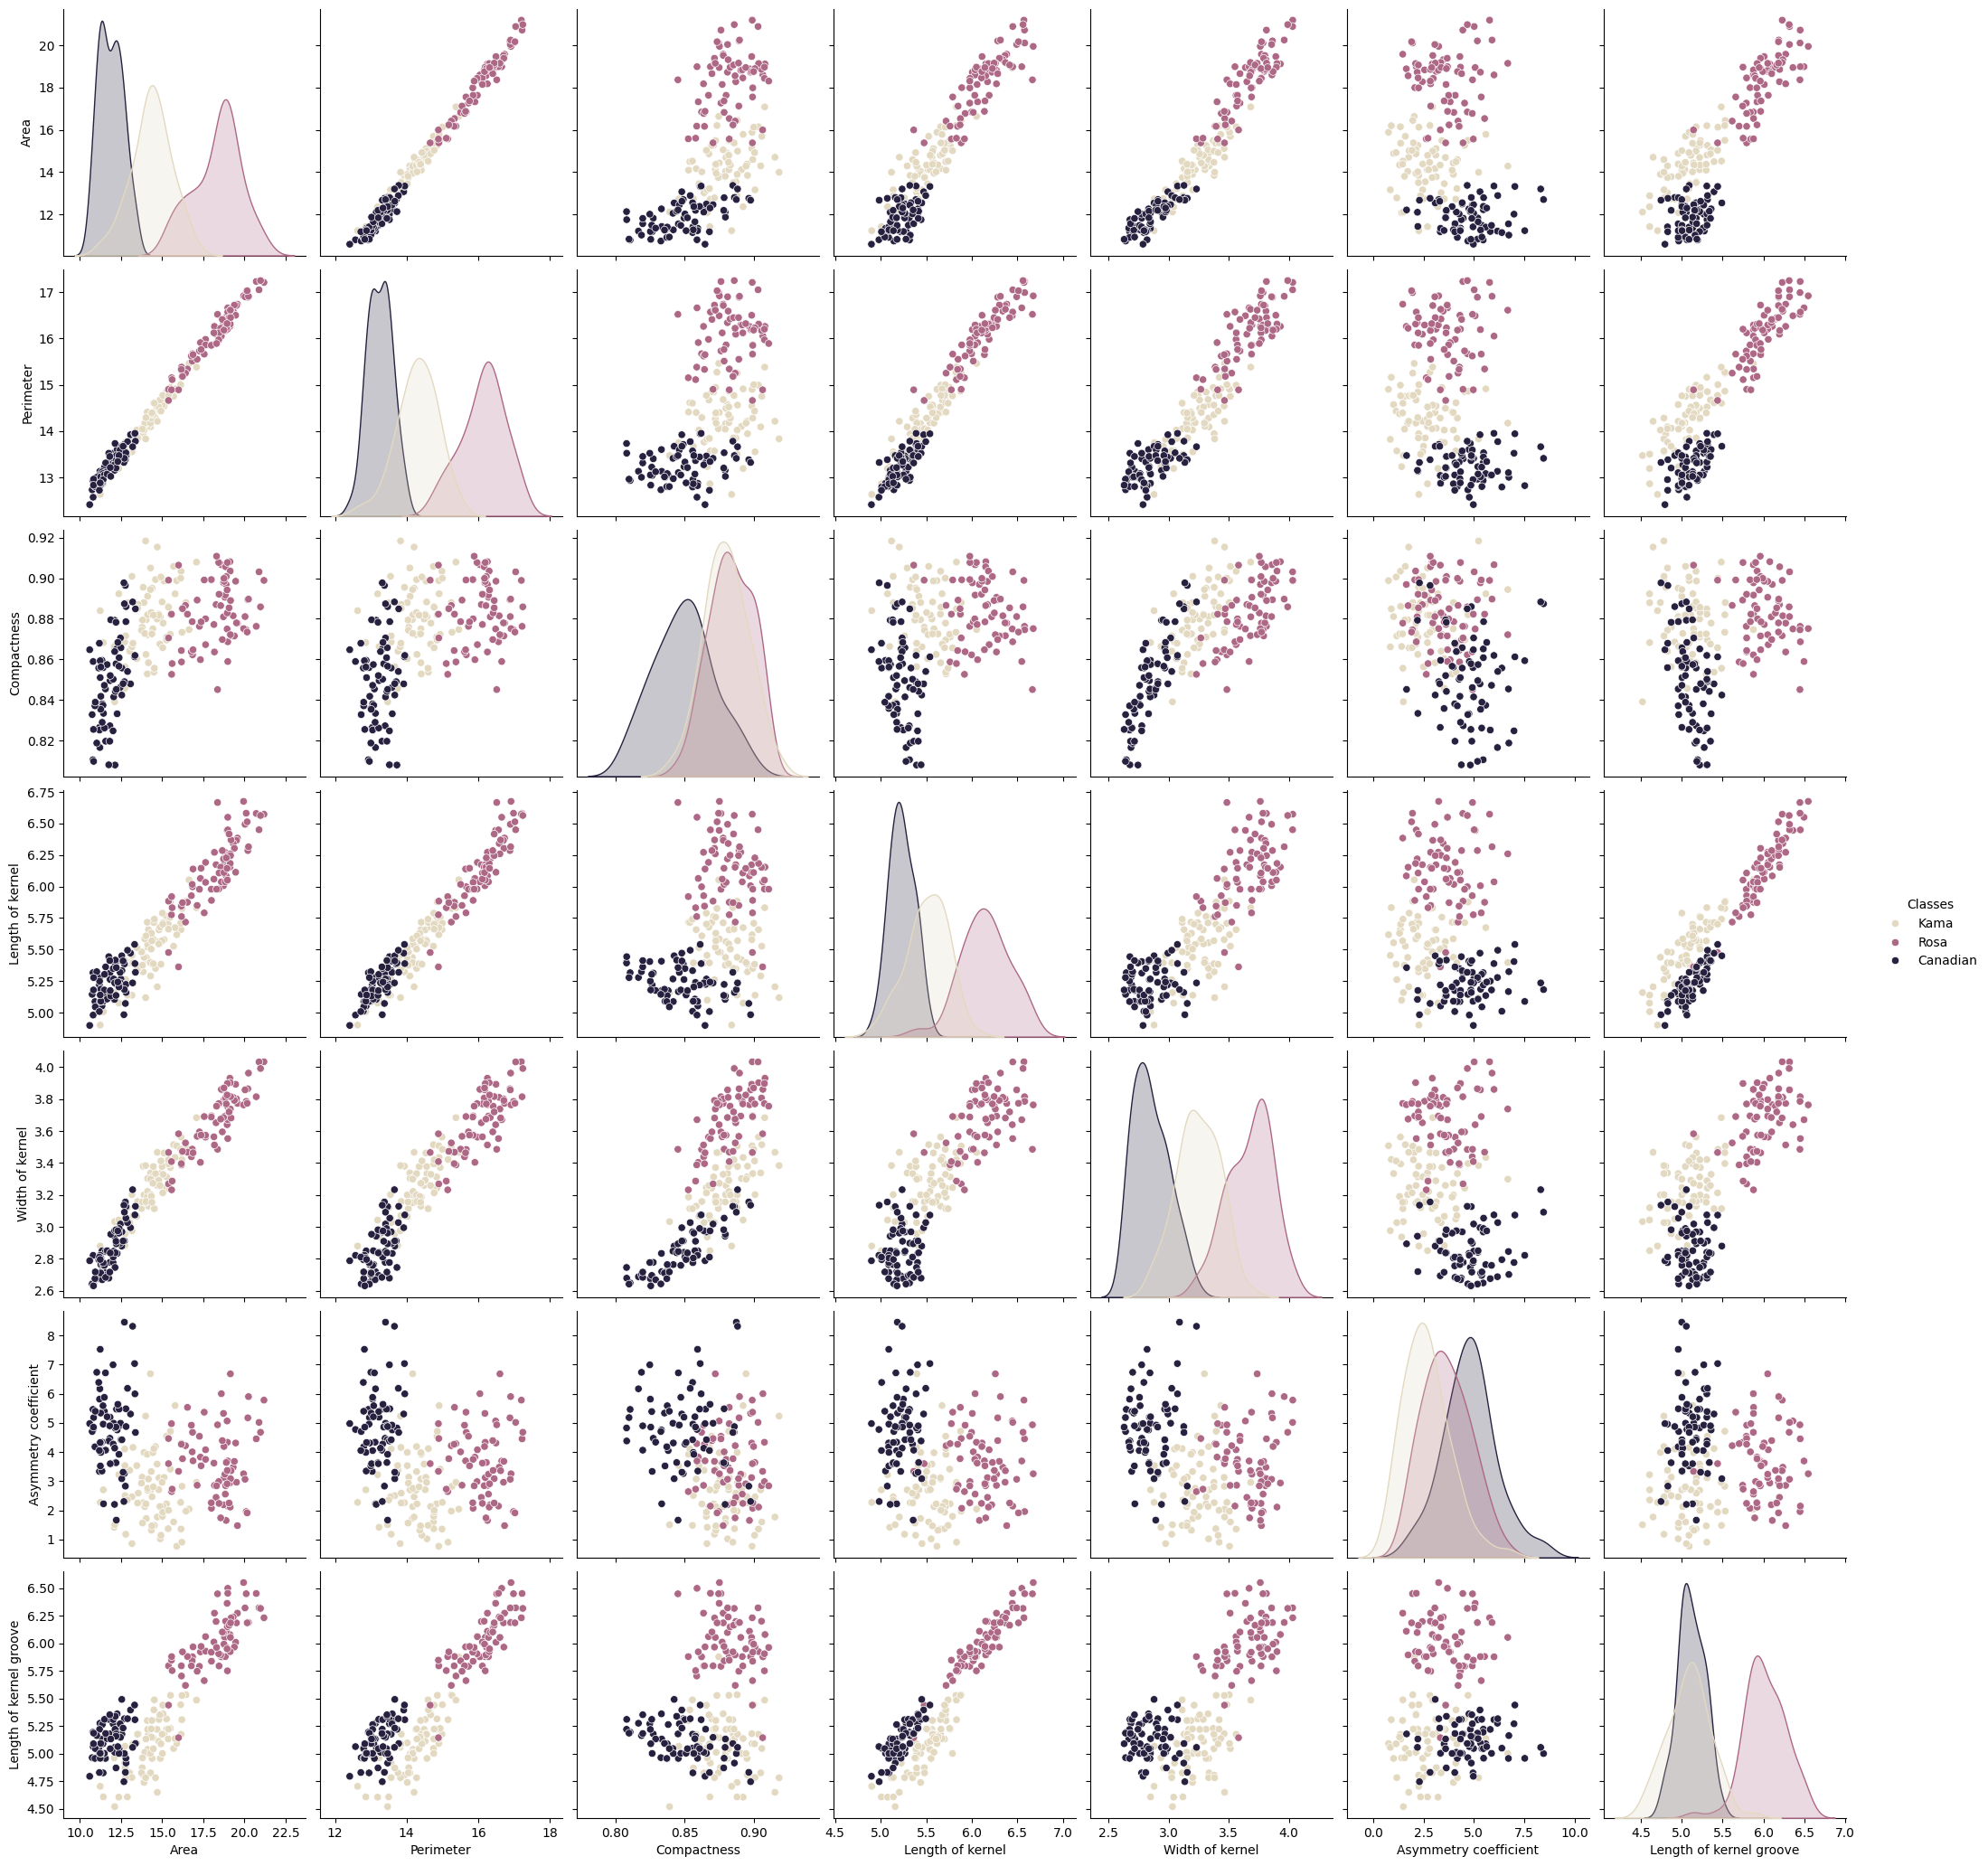

In [ ]:
sns.pairplot(data, height=3, diag_kind = 'kde', hue='Classes', palette="ch:s=-.2,r=.6")

##Correlation Matrix

Text(0.5, 1.05, 'Data Correlation of Features')

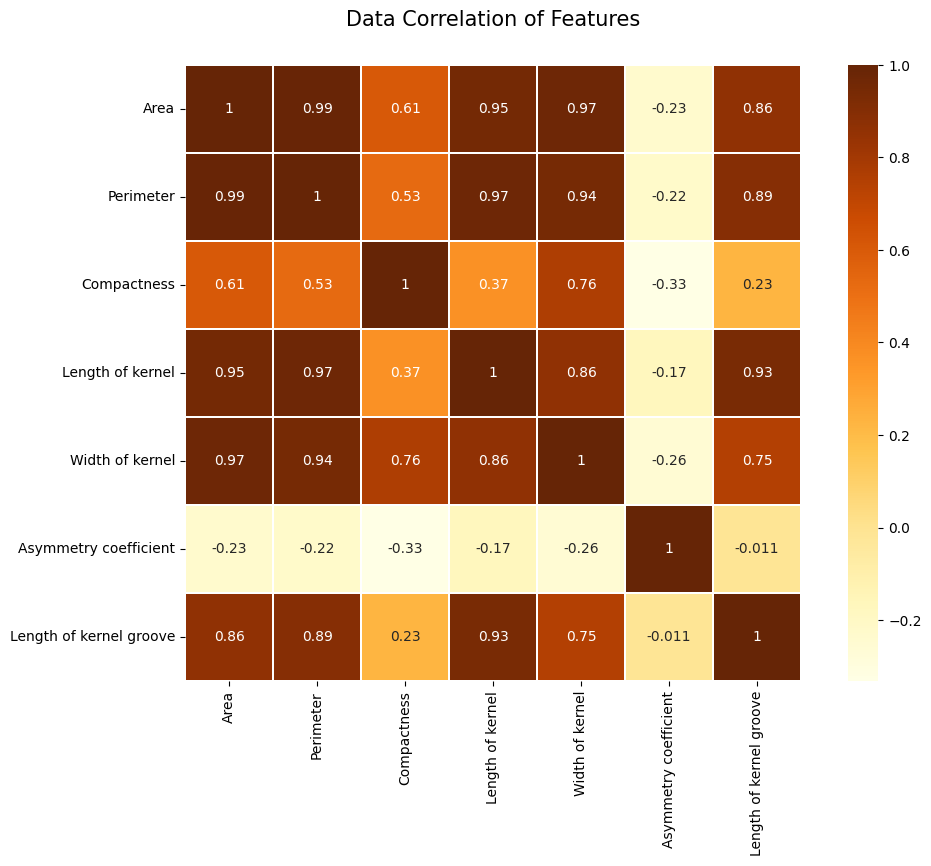

In [ ]:
corr = numerical_attributes.corr()
f, ax = plt.subplots(figsize=(12, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlOrBr", square=True, ax = ax, annot=True, linewidth = 0.1)
plt.title('Data Correlation of Features', y=1.05, size=15)

#Data Preparing

In [ ]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

from sklearn.model_selection import train_test_split
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

##Training Data 70%


In [ ]:
train = pd.DataFrame(x_train, columns = numerical_attributes.columns)
train.describe().round(2)

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
count,146.00,146.00,146.00,146.00,146.00,146.00,146.00
mean,14.60,14.44,0.87,5.59,3.23,3.76,5.37
std,2.91,1.30,0.02,0.44,0.38,1.49,0.49
min,10.59,12.41,0.81,4.90,2.63,0.77,4.52
25%,12.11,13.39,0.86,5.22,2.88,2.69,5.01
50%,14.06,14.14,0.87,5.47,3.20,3.63,5.19
75%,16.84,15.54,0.89,5.89,3.51,4.85,5.80
max,21.18,17.25,0.92,6.68,4.03,8.46,6.55


##Validation Data 20%


In [ ]:
valid = pd.DataFrame(x_val, columns = numerical_attributes.columns)
valid.describe().round(2)

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
count,42.00,42.00,42.00,42.00,42.00,42.00,42.00
mean,15.49,14.87,0.87,5.73,3.33,3.53,5.48
std,2.92,1.30,0.02,0.43,0.38,1.70,0.51
min,10.91,12.80,0.82,5.01,2.68,0.90,4.61
25%,13.11,13.84,0.86,5.40,3.05,2.14,5.15
50%,15.18,14.80,0.87,5.69,3.30,3.26,5.30
75%,18.53,16.20,0.89,6.08,3.59,4.38,5.92
max,20.88,17.05,0.91,6.58,4.03,6.99,6.45


##Testing Data 10%

In [ ]:
test = pd.DataFrame(x_test, columns = numerical_attributes.columns)
test.describe().round(2)

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
count,22.00,22.00,22.00,22.00,22.00,22.00,22.00
mean,15.28,14.75,0.87,5.70,3.32,3.63,5.51
std,2.80,1.28,0.02,0.46,0.34,1.19,0.49
min,10.74,12.73,0.83,4.98,2.64,1.72,4.74
25%,12.93,13.70,0.87,5.34,3.12,2.84,5.11
50%,14.59,14.50,0.88,5.61,3.27,3.35,5.35
75%,17.54,15.92,0.88,6.12,3.59,4.64,6.01
max,20.16,17.03,0.90,6.51,3.82,5.53,6.18
